## Notebook used to explore the data

In [2]:
import numpy as np
import astropy as ap
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4.8) # (6.4, 4.8) est la taille par défaut
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # pour remmettre la taille par défaut
import seaborn as sns
import copy
import sys

from astropy.table import QTable
import astropy.units as u

import physics.read_mist_models as read_mist_models

## Isochrones

In [2]:
with open("data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso", 'r') as f:
    lines = f.readlines()

print(len(lines))

for i in range(0, 500, 1):
    print(lines[i])


104530
# MIST version number  = 1.2     

# MESA revision number =     7503

# --------------------------------------------------------------------------------------

#  Yinit        Zinit   [Fe/H]   [a/Fe]  v/vcrit                                        

# 0.2703  1.42857E-02     0.00     0.00     0.00

# --------------------------------------------------------------------------------------

# number of isochrones =   107

# --------------------------------------------------------------------------------------

# number of EEPs, cols =   271   25

#   1                               2                               3                               4                               5                               6                               7                               8                               9                              10                              11                              12                              13                              14                       

l'âge de l'isochrone commence à 100 000 ans et augmente de ~12 000 ans à chaque incrément jusqu'à atteindre 1.99526e+10 ans (19.9526 milliards d'années)

le nombre de EEP (equivalent evolutionary point) tracks par isochrone augmente à chaque incrément du log10 de l'âge, pourquoi?


### Données intéressantes

- dans nom du fichier : [Fe/H] => la métallicité (le paramètre qui change entre tous les fichiers, de +0.50 à -4.00)
- colonne 2 : log10_isochrone_age_yr => âge de l'isochrone en log années
- (colonne 4 : star_mass => masse de l'étoile en masse solaire (masse juqu'à 3-5 nous intéresse))
- (colonne 8 : log_L => log luminosité bolométrique en luminosité solaire)
- colonne 11 : log_Teff => log température effective en Kelvin
- colonne 13 : log_g => log gravité de surface en cm*s<sup>-2</sup>
- (colonne 25 : phase => le type de phase de l'étoile défini par : -1=PMS, 0=MS, 2=RGB, 3=CHeB, 4=EAGB, 5=TPAGB, 6=postAGB, 9=WR)

In [9]:
iso_test = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_basic.txt')

infos = iso_test.read_iso_file()

# for data in infos:
#     print(data)

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.0_basic.txt


### Looking at the isochrones

In [5]:
xlabel_HR_Kiel = "$\log(T_{\mathrm{eff}}) [\mathrm{K}]$"

ylabel_HR = "$\log(L/L_{\odot})$"

ylabel_Kiel = "$\log(g) [\mathrm{cm/s^2}]$"

legend_title_age = "$\log(Age) [\mathrm{yr}]$"
legend_title_phase = "Phases"

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\antoi\AppData\Local\Temp\ipykernel_24704\4045614744.py:1: SyntaxWarning: invalid escape sequence '\l'
  xlabel_HR_Kiel = "$\log(T_{\mathrm{eff}}) [\mathrm{K}]$"
C:\Users\antoi\AppData\Local\Temp\ipykernel_24704\4045614744.py:3: SyntaxWarning: invalid escape sequence '\l'
  ylabel_HR = "$\log(L/L_{\odot})$"
C:\Users\antoi\AppData\Local\Temp\ipykernel_24704\4045614744.py:5: SyntaxWarning: invalid escape sequence '\l'
  ylabel_Kiel = "$\log(g) [\mathrm{cm/s^2}]$"
C:\Users\antoi\AppData\Local\Temp\ipykernel_24704\4045614744.py:7: SyntaxWarning: invalid escape sequence '\l'
  legend_title_

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\antoi\AppData\Local\Temp\ipykernel_15656\2459944687.py:1: SyntaxWarning: invalid escape sequence '\M'
  iso = read_mist_models.ISO("data\MIST_v1.2_vvcrit0.0_basic_isos\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso")


Reading in: data\MIST_v1.2_vvcrit0.0_basic_isos\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso
[3.46032918 3.46153773 3.46492278 ... 4.36785321 4.36077506 4.35367854]


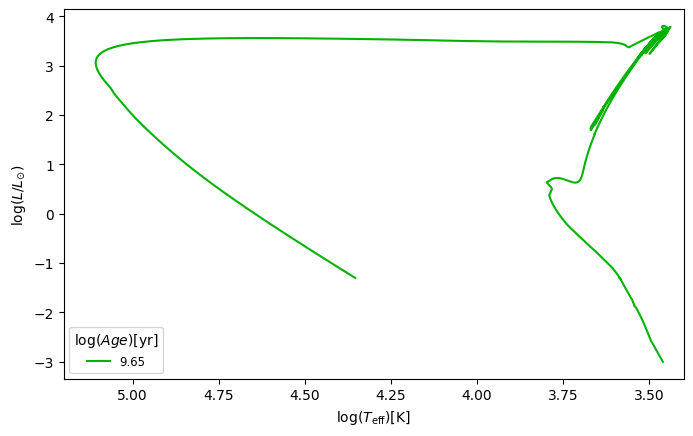

In [33]:
iso = read_mist_models.ISO("data\MIST_v1.2_vvcrit0.0_basic_isos\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso")

age_ind = iso.age_index(9.65)

logTeff = iso.isos[age_ind]['log_Teff']
print(logTeff)

logL = iso.isos[age_ind]['log_L']

plt.plot(logTeff, logL, c = (0, 0.7, 0), label="9.65")

plt.xlim(5.2, 3.4)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_age, fontsize="small")
# plt.title("HR diagram of an isochrone with the same age as the sun")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_isochrone_sun.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


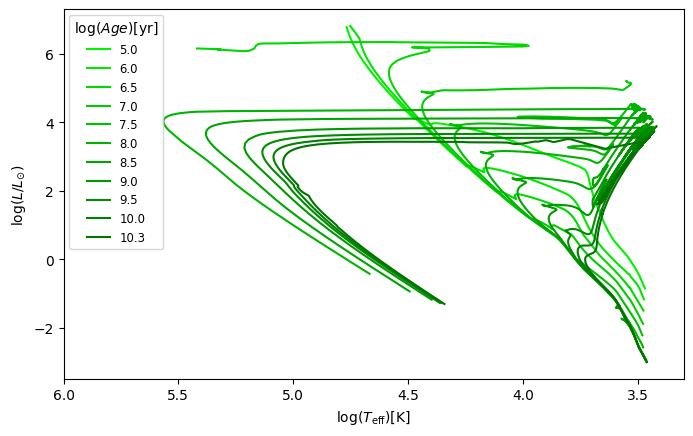

In [ ]:
# V1 sans pandas

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    # print(age_ind) # donne un index d'isochrone
    # print(iso.isos[age_ind]) # donne une liste de tous les paramètres de toutes les étoiles dans l'isochrone
    # print(iso.isos[age_ind]['log_Teff']) # donne une liste de la température de toutes les étoiles dans l'isochrone
    # break
    
    logL = iso.isos[age_ind]['log_L']

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(6, 3.3)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_age, fontsize="small")
# plt.title("HR diagram for isochrones with differing ages")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_isochrone_ages.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


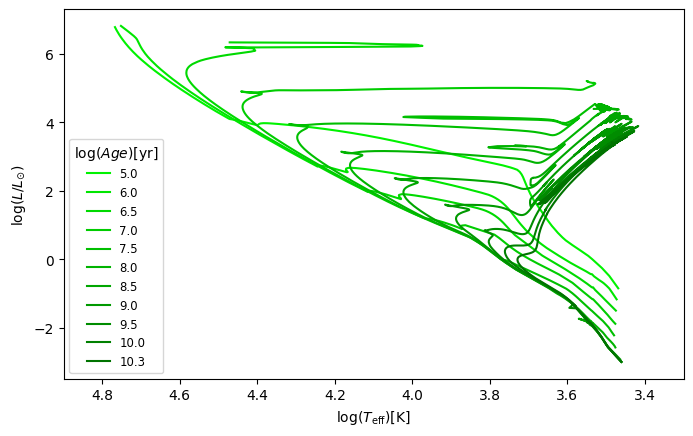

In [ ]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]

phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    plotted_Teff = []
    plotted_L = []
    for phase in phase_dict.keys():
        if phase in phase_list:
            plotted_Teff.extend(logTeff[phase_list == phase])
            plotted_L.extend(logL[phase_list == phase])
    
    plt.plot(plotted_Teff, plotted_L, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                                         1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                                         0))

plt.xlim(4.9, 3.3)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_age, fontsize="small")
# plt.title("HR diagram for isochrones with differing ages")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_isochrone_ages_used_phases.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


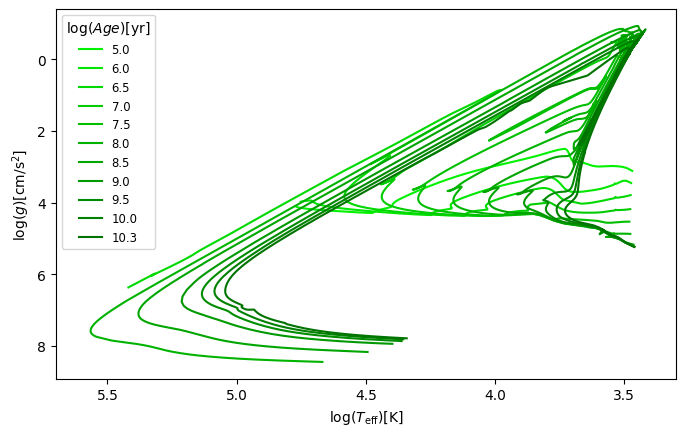

In [ ]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]

phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_g']

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(5.7, 3.3)
plt.gca().invert_yaxis()
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_Kiel)
plt.legend(title=legend_title_age, fontsize="small")
# plt.title("Kiel diagram for isochrones with differing ages")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/Kiel_isochrone_ages.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


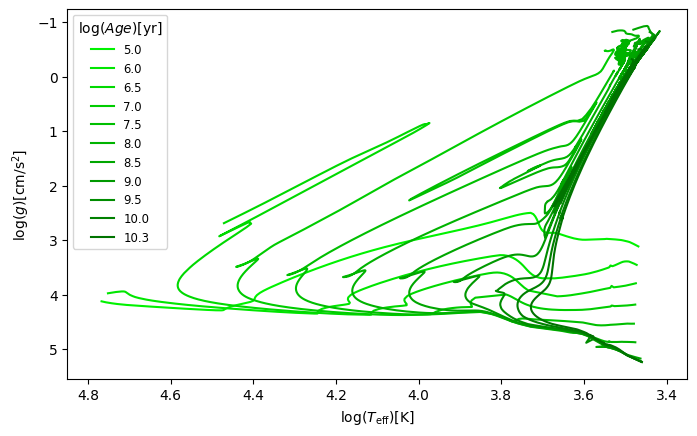

In [90]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_g']

    phase_list = iso.isos[age_ind]['phase']
    plotted_Teff = []
    plotted_L = []
    for phase in phase_dict.keys():
        if phase in phase_list:
            plotted_Teff.extend(logTeff[phase_list == phase])
            plotted_L.extend(logL[phase_list == phase])
    
    plt.plot(plotted_Teff, plotted_L, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                                         1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                                         0))

plt.xlim(4.85, 3.35)
plt.gca().invert_yaxis()
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_Kiel)
plt.legend(title=legend_title_age, fontsize="small")
# plt.title("Kiel diagram for isochrones with differing ages")
plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/Kiel_isochrone_ages_used_phases.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


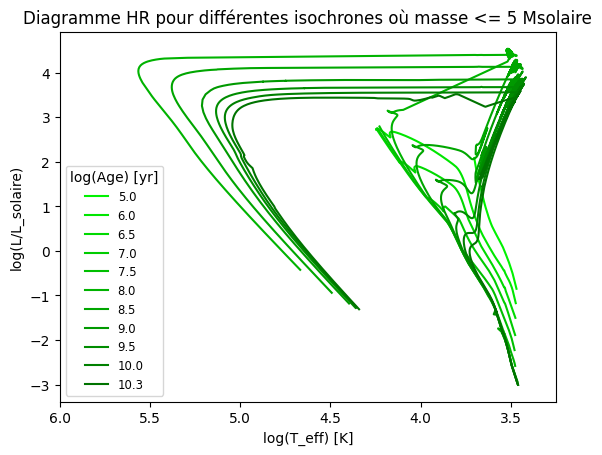

In [ ]:
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    
    mass_mask = []
    for mass in iso.isos[age_ind]['star_mass']:
        if mass <= 5:
            mass_mask.append(True)
        else:
            mass_mask.append(False)
    mass_mask = np.array(mass_mask)

    logTeff = iso.isos[age_ind]['log_Teff']
    logTeff = logTeff[mass_mask]
    
    logL = iso.isos[age_ind]['log_L']
    logL = logL[mass_mask]

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(6, 3.25)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_age, fontsize="small")
plt.title("Diagramme HR pour différentes isochrones où masse <= 5 Msolaire")
plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


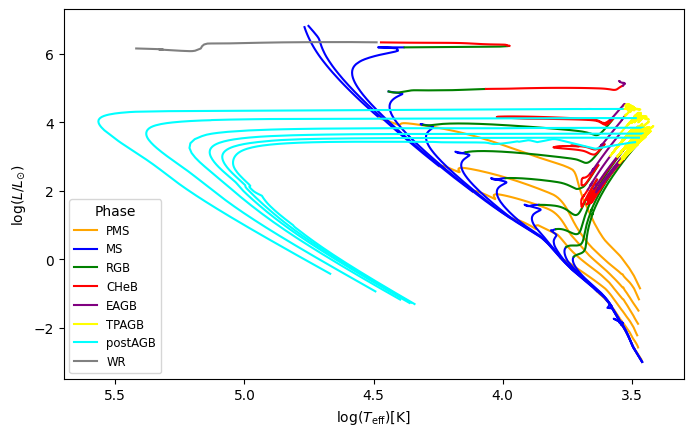

In [ ]:
import matplotlib.lines as mlines

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

# c_dict = {-1 : "black", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
c_dict = {-1 : "orange", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(5.7, 3.3)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("HR diagram for isochrones with differing ages and highlighted star phases")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_isochrone_phases.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


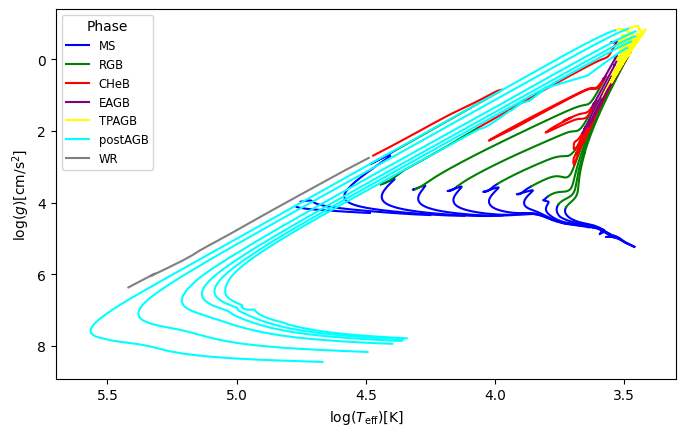

In [ ]:
import matplotlib.lines as mlines

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

# c_dict = {-1 : "black", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
c_dict = {0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_g']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(5.7, 3.3)
plt.gca().invert_yaxis()
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_Kiel)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("Kiel diagram for isochrones with differing ages and highlighted star phases")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/Kiel_phases.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


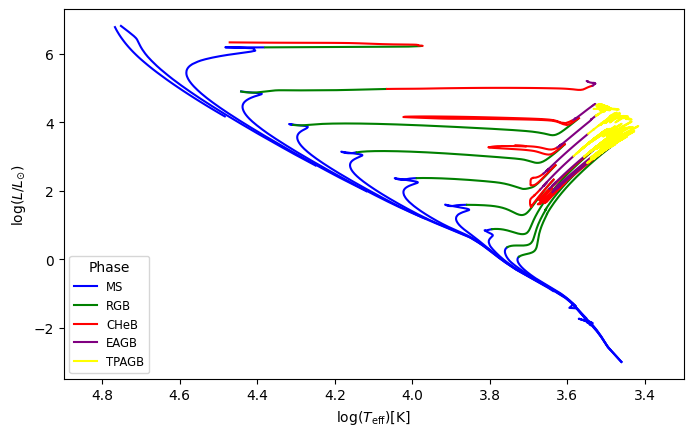

In [ ]:
import matplotlib.lines as mlines

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

c_dict = {0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(4.9, 3.3)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("HR diagram for isochrones with differing ages and highlighted star phases")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_used_phases.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


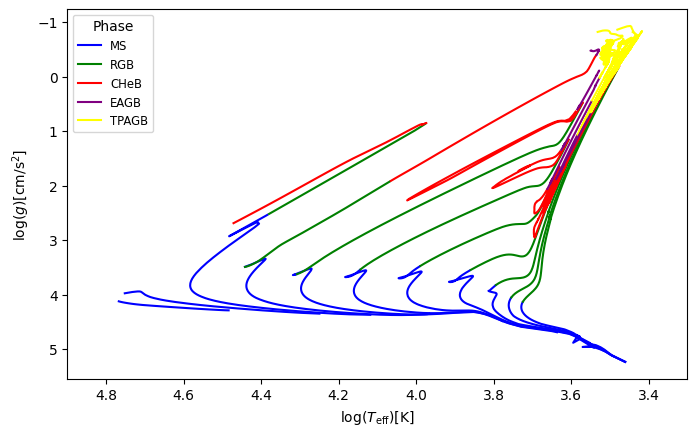

In [ ]:
import matplotlib.lines as mlines

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

c_dict = {0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_g']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(4.9, 3.3)
plt.gca().invert_yaxis()
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_Kiel)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("Kiel diagram for isochrones with differing ages and highlighted star phases")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/Kiel_used_phases.pdf", format="pdf")

plt.show()

#### Mettre les données dans les tables

In [12]:
# exemple

a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
           names=('a', 'b', 'c', 'd'),
           meta={'name': 'first table'})

t.info
print(t)

 a   b   c    d  
            m / s
--- --- --- -----
  1 2.0   x  10.0
  4 5.0   y  20.0
  5 8.5   z  30.0


In [ ]:
# création de une table par age
iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

isos_data = []
for iso_ind in range(len(iso.isos)):
    logTeff = iso.isos[iso_ind]['log_Teff']
    logL = iso.isos[iso_ind]['log_L']
    log_g = iso.isos[iso_ind]['log_g']
    t = QTable([logTeff, logL, log_g],
           names=('logTeff', 'logL', 'log_g'),
           meta={'name': f"iso age {iso.isos[age_ind]['log10_isochrone_age_yr'][0]}"})
    isos_data.append(t.copy())

print(isos_data[0])

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt
     logTeff               logL              log_g       
------------------ ------------------- ------------------
3.4685410950939577 -0.8496952161361735  3.116651462997313
 3.469176422523654 -0.8396429021164937   3.11404210672383
3.4711160413528623 -0.8089438206169329 3.1061332305144638
3.4730352483724785 -0.7785635954667783 3.0984168687617104
 3.474944293275982 -0.7483679008494489 3.0908753040092383
3.4768367646597858 -0.7184353117899261 3.0835244726266504
 3.478709566027834 -0.6888117970457147 3.0763774543169644
 3.480566492429194 -0.6594253968508426  3.069404489127999
 3.482408695407301 -0.6302573711407673 3.0626116125825877
 3.484230014089774 -0.6013636407419086 3.0559923061288554
               ...                 ...                ...
4.7402734345513435   6.316050211478551 4.1624359200071375
 4.741872006393486   6.338894609254394  4.160661006297343
 4.746095902183563  6.40151258420

In [14]:
# création d'une table avec tout
def get_iso_data_panda(file):
    iso = read_mist_models.ISO(file)

    age = []
    logTeff = []
    logL = []
    log_g = []
    for iso_ind in range(len(iso.isos)):
        age.extend(iso.isos[iso_ind]['log10_isochrone_age_yr'])
        logTeff.extend(iso.isos[iso_ind]['log_Teff'])
        logL.extend(iso.isos[iso_ind]['log_L'])
        log_g.extend(iso.isos[iso_ind]['log_g'])

    iso_data_all = QTable([age, logTeff, logL, log_g],
                        names=('age', 'logTeff', 'logL', 'log_g'),
                        meta={'name': "iso data"})
    # print(iso_data_all.info)
    # print(iso_data_all)
    # display(iso_data_all.to_pandas())
    return iso_data_all.to_pandas()

In [ ]:
# V2 avec pandas => pas intéressant

iso_data = get_iso_data_panda('data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt')

print(iso_data.age.unique())

print(iso_data.loc[iso_data['age'] == 5.15])

sys.exit(1)

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    plt.plot(logTeff, logL, label=f"{age}", c=(0, # 0.5-colors[i] if 0.5-colors[i]>0 else 0,
                                               1-colors[i], # 0.5-colors[i] if 0.5-colors[i]>0 else 0, 
                                               0))

plt.xlim(6, 3.25)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_age, fontsize="small")
plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt
[ 5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35  5.4   5.45  5.5   5.55
  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95  6.    6.05  6.1   6.15
  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55  6.6   6.65  6.7   6.75
  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35
  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7.75  7.8   7.85  7.9   7.95
  8.    8.05  8.1   8.15  8.2   8.25  8.3   8.35  8.4   8.45  8.5   8.55
  8.6   8.65  8.7   8.75  8.8   8.85  8.9   8.95  9.    9.05  9.1   9.15
  9.2   9.25  9.3   9.35  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75
  9.8   9.85  9.9   9.95 10.   10.05 10.1  10.15 10.2  10.25 10.3 ]
       age   logTeff      logL     log_g
816   5.15  3.469250 -0.895256  3.165046
817   5.15  3.470837 -0.870787  3.159459
818   5.15  3.472713 -0.841818  3.152934
819   5.15  3.474571 -0.813118  3.146594
820   5.15  3.476409 -0.784700  3.140447
...  

SystemExit: 1

c:\Users\antoi\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
# V3 avec choix des colonnes
def get_iso_data_panda_dict(file, col_names):
    iso = read_mist_models.ISO(file)

    col_dict = {key: [] for key in col_names}

    for iso_ind in range(len(iso.isos)):
        for keys in col_dict.keys():
            col_dict[keys].extend(iso.isos[iso_ind][keys])

    return pd.DataFrame.from_dict(col_dict)

In [8]:
df = get_iso_data_panda_dict('data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt', ["log10_isochrone_age_yr", "log_Teff", "log_L", "log_g", "star_mass", "phase"])

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


In [63]:
display(df)

,log10_isochrone_age_yr,log_Teff,log_L,log_g,star_mass,phase
0,5.0,3.468541,-0.849695,3.116651,0.100000,-1.0
1,5.0,3.469176,-0.839643,3.114042,0.101392,-1.0
2,5.0,3.471116,-0.808944,3.106133,0.105660,-1.0
3,5.0,3.473035,-0.778564,3.098417,0.109915,-1.0
4,5.0,3.474944,-0.748368,3.090875,0.114180,-1.0
...,...,...,...,...,...,...
103984,10.3,4.370643,-1.180793,7.779334,0.528715,6.0
103985,10.3,4.363336,-1.212858,7.782175,0.528717,6.0
103986,10.3,4.356026,-1.244886,7.784962,0.528720,6.0
103987,10.3,4.348711,-1.276875,7.787695,0.528724,6.0


#### Matrice de covariance

In [ ]:
col_names = ["log10_isochrone_age_yr", "initial_mass", "star_mass", "star_mdot", "he_core_mass", "c_core_mass", "log_L", 
             "log_LH", "log_LHe", "log_Teff", "log_R", "log_g", "surface_h1", "surface_he3", "surface_he4", "surface_c12",
             "surface_o16", "log_center_T", "log_center_Rho", "center_gamma", "center_h1", "center_he4", "center_c12", "phase"]

iso_df = get_iso_data_panda_dict('data/MIST_v1.2_vvcrit0.0_basic_isos_txt/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt', col_names)

cov_mat = np.cov(np.transpose(iso_df), bias=True)

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.txt


In [22]:
for i in range(len(cov_mat)):
    cov_mat[i][i] = 0

<Axes: >

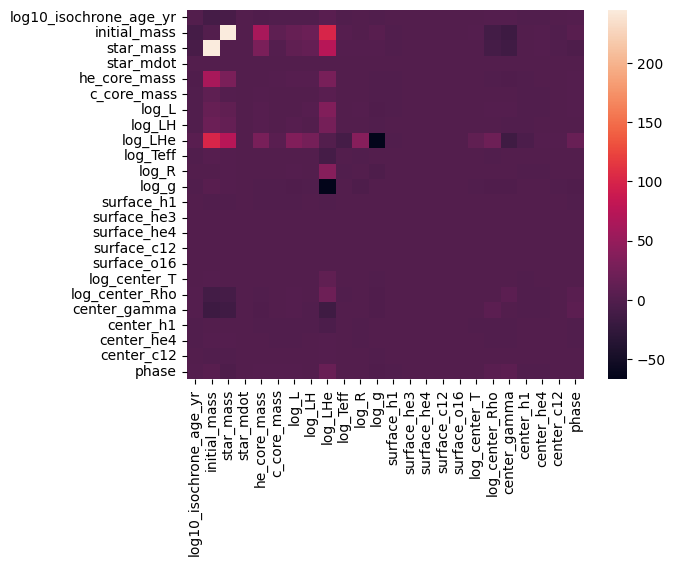

In [23]:
sns.heatmap(cov_mat, annot=False, fmt='g', xticklabels=col_names, yticklabels=col_names)

In [4]:
full_iso_df = pd.read_csv("data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_iso_full_data.csv")

In [5]:
print(full_iso_df["star_mass"].value_counts(bins=50, sort=False))

(-0.199, 6.069]       1214352
(6.069, 12.038]        105379
(12.038, 18.007]        42058
(18.007, 23.976]        23609
(23.976, 29.944]        17839
(29.944, 35.913]        12102
(35.913, 41.882]         8688
(41.882, 47.851]         5999
(47.851, 53.82]          4747
(53.82, 59.789]          4434
(59.789, 65.758]         3078
(65.758, 71.727]         3559
(71.727, 77.696]         2137
(77.696, 83.665]         1639
(83.665, 89.633]         2593
(89.633, 95.602]         1480
(95.602, 101.571]        1056
(101.571, 107.54]        1004
(107.54, 113.509]        1047
(113.509, 119.478]       1837
(119.478, 125.447]        519
(125.447, 131.416]        703
(131.416, 137.385]        518
(137.385, 143.353]        501
(143.353, 149.322]        354
(149.322, 155.291]        429
(155.291, 161.26]         435
(161.26, 167.229]         228
(167.229, 173.198]        435
(173.198, 179.167]        439
(179.167, 185.136]        353
(185.136, 191.105]        212
(191.105, 197.074]        158
(197.074, 

In [10]:
print(full_iso_df["star_mass"].where(full_iso_df["star_mass"] < 20).count())
print(full_iso_df["star_mass"].where(full_iso_df["star_mass"] > 20).count())

1370119
97003


In [11]:
phase_filtered_iso_df = full_iso_df\
    .where((full_iso_df.phase == 0) | (full_iso_df.phase == 2) | (full_iso_df.phase == 3) | (full_iso_df.phase == 4) | (full_iso_df.phase == 5))\
    .dropna().reset_index(drop=True)

In [13]:
print(phase_filtered_iso_df["star_mass"].where(phase_filtered_iso_df["star_mass"] < 40).count())
print(phase_filtered_iso_df["star_mass"].where(phase_filtered_iso_df["star_mass"] > 40).count())

1123262
42035


## Evolutionary tracks

faire le graphe avec d'autres couleurs pour les phases

<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\antoi\AppData\Local\Temp\ipykernel_6088\3499237953.py:5: SyntaxWarning: invalid escape sequence '\E'
  track = read_mist_models.EEP(f'data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/{mass}M.track.eep')


Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00010M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00040M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00080M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00150M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00240M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00800M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/01600M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/03000M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/06000M.track.eep
Reading in: data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/10000M.track.eep
Reading in: data\EEP_

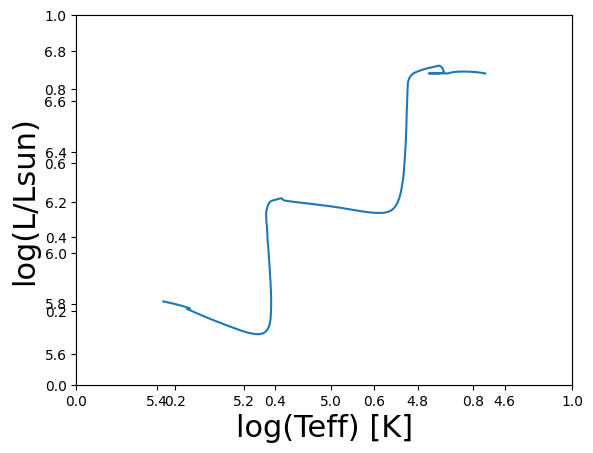

In [24]:
masses = [0.1, 0.4, 0.8, 1.5, 2.4, 4.0, 8.0, 16.0, 30.0, 60.0, 100.0, 250.0]
masses_str = ["00010", "00040", "00080", "00150", "00240", "00400", "00800", "01600", "03000", "06000", "10000", "25000"]

for i, mass in enumerate(masses_str):
    track = read_mist_models.EEP(f'data\EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/{mass}M.track.eep')

track.plot_HR()


<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\antoi\AppData\Local\Temp\ipykernel_16104\3298011798.py:3: SyntaxWarning: invalid escape sequence '\M'
  evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')


Reading in: data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep


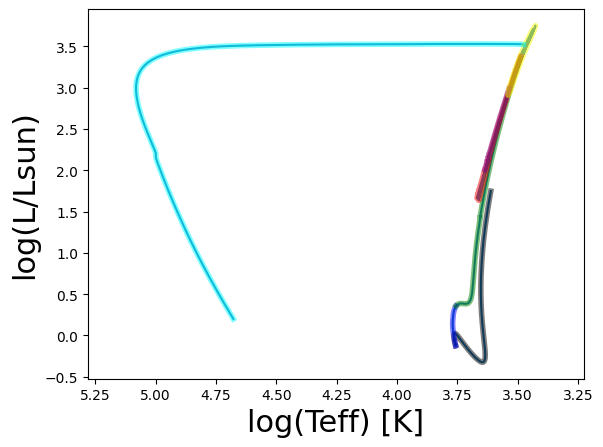

In [ ]:
import physics.read_mist_models as read_mist_models

evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')

evo_tracks.plot_HR(phases=[-1, 0, 2, 3, 4, 5, 6, 9], phasecolor=['black', 'blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'grey'])
# evo_tracks.plot_HR()

In [13]:
evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00010M.track.eep')

test = evo_tracks.read_eep_file()

# for i in test:
#     print(i)

count = 0
for i in test[5]:
    count += 1
    print(i)
    print(i['phase'])
    print(type(i))
    if count > 10:
        break


Reading in: data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00010M.track.eep
(59482.59295593, 0.09999999, -1.00293909e-13, 0., 0., 0., -0.79645765, -4.15158796, -4.05905335, -99., -99., 3.46766863, -0.7967521, 0.18911106, 3.05992406, -1.84509847, 0., 0., 0.5448972, 2.69680474e-07, 0., 0., 0., 0., 0., -9.48984271e-09, 0.71539999, 4.48631836e-05, 0.27025514, 9.87259339e-09, 1.68978091e-10, 0., 0.00249654, 3.03047909e-05, 0.00073729, 0.00610889, 5.39170681e-07, 0.00123918, 3.12279612e-05, 0.00058957, 0.00065265, 0.0003131, 6.85354708e-05, 3.33461148e-06, 0.00158464, 5.73879387, -0.5673892, -2.75354502, 0., 0.29643678, 0.09999999, 0.71539999, 0.27025514, 0.00249654, 0.00073729, 0.00610889, 0.00123918, 0.00058957, 0.00065265, -4.05905335, -61.16079871, -99., -99., -99., -99., -99., 22.47707299, 0., 182.03563027, 1231.08279827, 0.10162739, 1.11852865, 0., 0.99998807, 1.838208e-05, 2.2859171e+46, -1.)
-1.0
<class 'numpy.void'>
(62639.16284155, 0.09999999, -9.87068798e-14, 0., 0., 

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\antoi\AppData\Local\Temp\ipykernel_16104\2956294014.py:1: SyntaxWarning: invalid escape sequence '\M'
  evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00010M.track.eep')


<>:13: SyntaxWarning: invalid escape sequence '\M'
<>:13: SyntaxWarning: invalid escape sequence '\M'
C:\Users\antoi\AppData\Local\Temp\ipykernel_15656\437452785.py:13: SyntaxWarning: invalid escape sequence '\M'
  evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')


Reading in: data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep


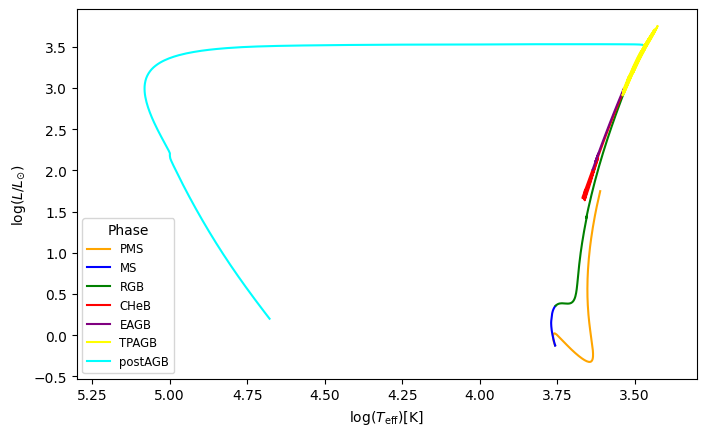

In [ ]:
import physics.read_mist_models as read_mist_models
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import sys

phases=[-1, 0, 2, 3, 4, 5, 6, 9]
phasecolor=['black', 'blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'grey']

c_dict = {-1 : "orange", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB"}

evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')

eeps = evo_tracks.read_eep_file()[5]

logTeff = eeps['log_Teff']
logL = eeps['log_L']
phase_list = eeps['phase']

for phase in c_dict.keys():
    if phase in phase_list:
        plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(5.3, 3.3)
# plt.ylim(1.5, 4)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("Evolutionary track of a star with 1 solar mass")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/evolutionary_track_sun_mass.pdf", format="pdf")

plt.show()


# fig = plt.figure(0)

# ax = fig.add_subplot(111)
# ax.plot(logTeff, logL)
# ax.axis([max(logTeff)+0.1, min(logTeff)-0.1, min(logL)-0.1, max(logL)+0.1])
# ax.set_xlabel('log(Teff) [K]', fontsize=22)
# ax.set_ylabel('log(L/Lsun)', fontsize=22)

<>:13: SyntaxWarning: invalid escape sequence '\M'
<>:13: SyntaxWarning: invalid escape sequence '\M'
C:\Users\antoi\AppData\Local\Temp\ipykernel_15656\3890658962.py:13: SyntaxWarning: invalid escape sequence '\M'
  evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')


Reading in: data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep


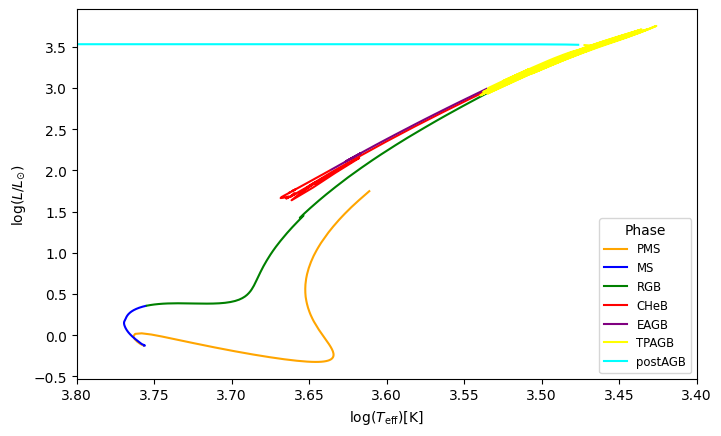

In [ ]:
import physics.read_mist_models as read_mist_models
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import sys

phases=[-1, 0, 2, 3, 4, 5, 6, 9]
phasecolor=['black', 'blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'grey']

c_dict = {-1 : "orange", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB"}

evo_tracks = read_mist_models.EEP('data/EEP_tracks\MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')

eeps = evo_tracks.read_eep_file()[5]

logTeff = eeps['log_Teff']
logL = eeps['log_L']
phase_list = eeps['phase']

for phase in c_dict.keys():
    if phase in phase_list:
        plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(3.8, 3.4)
# plt.ylim(1.5, 3.8)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("Evolutionary track of a star with 1 solar mass")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/evolutionary_track_sun_mass_zoom.pdf", format="pdf")

plt.show()

Reading in: data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso


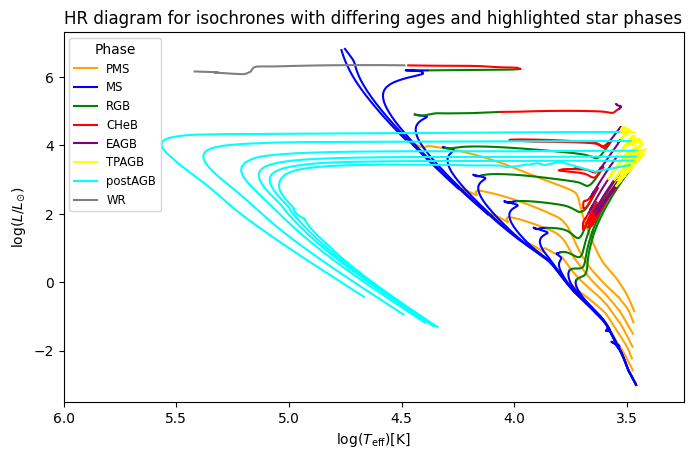

In [58]:
import matplotlib.lines as mlines

iso = read_mist_models.ISO('data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')

# c_dict = {-1 : "black", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
c_dict = {-1 : "orange", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(6, 3.25)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
plt.title("HR diagram for isochrones with differing ages and highlighted star phases")
plt.show()

## Checking the values distribution and their associated parameters

### Radius

In [25]:
from ML.utils.Iso_data_handler import Iso_data_handler
from ML.utils.Data_preparator import Data_preparator

In [ ]:
iso_handler = Iso_data_handler("C:/Users/antoi/Code/unif/MA2/thesis/data/MIST_v1.2_vvcrit0.0_basic_isos/", 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R', 'initial_mass'],
                              "MIST")

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)

Reading dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R,initial_mass
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402,0.100000
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326,0.102645
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785,0.107039
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099,0.111419
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305,0.115789
...,...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255,0.925792
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295,0.925825
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237,0.925866
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091,0.925919


In [27]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R,initial_mass
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679,13.585307
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753,13.766502
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755,13.943919
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670,14.593221
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187,15.428247
...,...,...,...,...,...,...,...,...
1165292,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899,0.925549
1165293,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797,0.925549
1165294,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036,0.925549
1165295,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981,0.925549


In [29]:
sorted_phase_filtered_iso_df = phase_filtered_iso_df.sort_values(by=["log_R"]).reset_index(drop=True)
display(sorted_phase_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R,initial_mass
0,7.85,4.800335,8.612102,4.0,-0.25,1.009629,-2.085172,6.111341
1,7.85,4.807715,8.610719,4.0,-0.25,1.009493,-2.084511,6.109784
2,7.85,4.815109,8.609335,4.0,-0.25,1.009366,-2.083847,6.108333
3,7.85,4.822514,8.607946,4.0,-0.25,1.009248,-2.083179,6.106978
4,7.85,4.829930,8.606554,4.0,-0.25,1.009137,-2.082507,6.105718
...,...,...,...,...,...,...,...,...
1165292,6.80,3.503584,-0.499675,3.0,0.50,19.869413,3.117896,23.708132
1165293,6.80,3.511249,-0.544122,3.0,0.50,18.101373,3.119670,24.159144
1165294,6.80,3.507527,-0.547837,3.0,0.50,18.393494,3.125210,24.072323
1165295,6.80,3.501327,-0.535780,3.0,0.50,19.260843,3.129270,23.855119


In [44]:
sorted_phase_log_R_filtered_iso_df = Data_preparator.filter_data(sorted_phase_filtered_iso_df, {'phase':[0, 2, 3, 4, 5], 'log_R': ("<", -1.0)})
display(sorted_phase_log_R_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R,initial_mass
0,7.85,4.800335,8.612102,4.0,-0.25,1.009629,-2.085172,6.111341
1,7.85,4.807715,8.610719,4.0,-0.25,1.009493,-2.084511,6.109784
2,7.85,4.815109,8.609335,4.0,-0.25,1.009366,-2.083847,6.108333
3,7.85,4.822514,8.607946,4.0,-0.25,1.009248,-2.083179,6.106978
4,7.85,4.829930,8.606554,4.0,-0.25,1.009137,-2.082507,6.105718
...,...,...,...,...,...,...,...,...
11772,9.65,5.075972,6.163395,5.0,-3.00,0.526258,-1.002025,1.077354
11773,10.20,5.026435,6.166456,5.0,-2.00,0.531200,-1.001544,0.741589
11774,9.40,5.076178,6.175108,5.0,-4.00,0.543162,-1.001028,1.303665
11775,9.40,5.108514,6.186273,5.0,-3.00,0.561473,-1.000410,1.342952


In [45]:
def print_uniques(col_name):
    uniques = sorted_phase_log_R_filtered_iso_df[col_name].unique()
    uniques.sort()
    if len(uniques) < 50:
        print(col_name + " : " + str(uniques))
    else:
        print(f"{col_name} : {len(uniques)} unique values, range [{uniques[0]}, {uniques[-1]}]")

print_uniques('phase')
print_uniques('log10_isochrone_age_yr')
print_uniques('log_Teff')
print_uniques('log_g')
print_uniques('metallicity')
print_uniques('star_mass')
print_uniques('log_R')
print_uniques('initial_mass')

phase : [3. 4. 5.]
log10_isochrone_age_yr : [ 7.85  7.9   7.95  8.    8.05  8.1   8.15  8.2   8.25  8.3   8.35  8.5
  8.6   8.65  8.7   8.75  8.8   8.85  8.9   8.95  9.    9.05  9.1   9.15
  9.2   9.25  9.3   9.35  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75
  9.8   9.85  9.9   9.95 10.   10.05 10.1  10.15 10.2  10.25]
log_Teff : 11777 unique values, range [4.32821962681543, 5.587140896561816]
log_g : 11777 unique values, range [6.162996296457286, 8.612101665912416]
metallicity : [-4.   -3.5  -3.   -2.   -0.5  -0.25  0.    0.25  0.5 ]
star_mass : 11777 unique values, range [0.5080627784671639, 1.0096290757134294]
log_R : 11777 unique values, range [-2.085171571669866, -1.0000889607228158]
initial_mass : 11777 unique values, range [0.7155947750401582, 6.111340766182623]


In [41]:
def print_uniques_count(col_name):
    uniques = sorted_phase_log_R_filtered_iso_df[col_name].unique()
    print(f"{col_name} : ")
    summ = 0
    for unique in uniques:
        a = np.count_nonzero(sorted_phase_log_R_filtered_iso_df[col_name] == unique)
        summ += a
        print(f"\t{unique} => {np.count_nonzero(sorted_phase_log_R_filtered_iso_df[col_name] == unique)}")
    print(summ)
        


print_uniques_count('phase')
print_uniques_count('log10_isochrone_age_yr')
# print_uniques_count('log_Teff')
# print_uniques_count('log_g')
print_uniques_count('metallicity')
# print_uniques_count('star_mass')
# print_uniques_count('log_R')
# print_uniques_count('initial_mass')

phase : 
	4.0 => 598
	5.0 => 9999
	3.0 => 1180
11777
log10_isochrone_age_yr : 
	7.85 => 137
	7.9 => 285
	7.950000000000001 => 142
	8.0 => 145
	8.05 => 271
	8.100000000000001 => 131
	8.15 => 130
	8.200000000000001 => 275
	8.25 => 144
	8.3 => 143
	8.350000000000001 => 143
	8.5 => 141
	8.700000000000001 => 269
	8.75 => 404
	8.600000000000001 => 269
	8.8 => 283
	8.65 => 176
	8.850000000000001 => 424
	8.9 => 216
	8.950000000000001 => 506
	9.0 => 523
	9.1 => 373
	9.05 => 271
	9.150000000000002 => 281
	9.2 => 404
	9.25 => 278
	9.85 => 137
	9.35 => 147
	9.400000000000002 => 401
	9.3 => 278
	9.5 => 531
	9.55 => 190
	9.6 => 380
	9.7 => 386
	9.8 => 386
	10.0 => 255
	9.900000000000002 => 278
	9.45 => 278
	10.1 => 199
	10.150000000000002 => 144
	10.2 => 149
	10.25 => 154
	9.650000000000002 => 303
	9.75 => 139
	9.95 => 139
	10.05 => 139
11777
metallicity : 
	-0.25 => 1261
	0.0 => 145
	-3.0 => 3647
	-3.5 => 1784
	-4.0 => 1921
	0.25 => 947
	0.5 => 1072
	-0.5 => 138
	-2.0 => 862
11777


In [49]:
display(sorted_phase_log_R_filtered_iso_df.where(sorted_phase_log_R_filtered_iso_df.metallicity == 0).dropna())

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R,initial_mass
71,7.9,4.743077,8.520813,4.0,0.0,0.960873,-2.050114,5.903031
74,7.9,4.750638,8.519113,4.0,0.0,0.960671,-2.049309,5.901081
77,7.9,4.758217,8.517411,4.0,0.0,0.960483,-2.048501,5.899257
80,7.9,4.765816,8.515703,4.0,0.0,0.960308,-2.047687,5.897566
84,7.9,4.773429,8.513988,4.0,0.0,0.960143,-2.046866,5.895973
...,...,...,...,...,...,...,...,...
11322,7.9,5.402205,6.633077,4.0,0.0,0.957295,-1.107057,5.865039
11410,7.9,5.390795,6.586842,4.0,0.0,0.957344,-1.083928,5.865039
11517,7.9,5.379384,6.540608,4.0,0.0,0.957394,-1.060799,5.865039
11625,7.9,5.367974,6.494373,4.0,0.0,0.957443,-1.037671,5.865039


phase : -1=PMS,0=MS,2=RGB,3=CHeB,4=EAGB, 5=TPAGB,6=postAGB,9=WR

log_10_isochrone_age_yr : Age of the isochrone in log years

log_Teff : Log effective temperature in K

log_g : Log surface gravity in cms^-2

metallicity : [Fe/H]

star_mass : Current mass in solar M

log_R : Log radius in solar R

initial_mass : Initial mass in solar M


Faire un plot des données avec les rayons de -2 à -1 pour voir où se trouve les étoiles sur le diagramme HR

faire un plot HR des autres métallicités

checkez mon filtre pour être sûr que je prends bien les bonnes données

Reading in: ../../data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_basic.iso


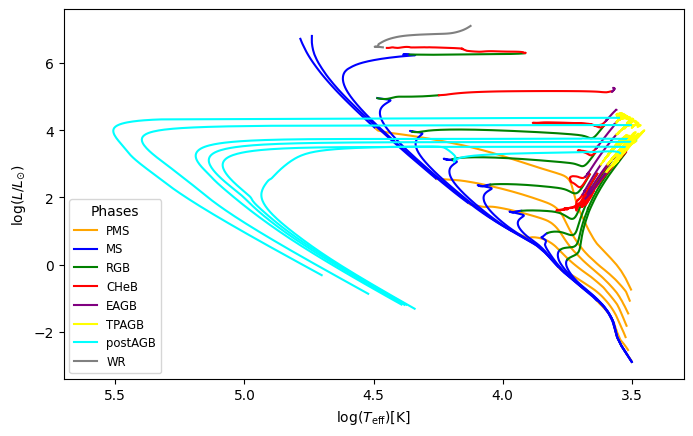

In [14]:
import physics.read_mist_models as read_mist_models
import matplotlib.lines as mlines

iso = read_mist_models.ISO('../../data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

c_dict = {-1 : "orange", 0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "yellow", 6 : "cyan", 9 : "grey"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(5.7, 3.3)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("HR diagram for isochrones with differing ages and highlighted star phases")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_used_phases.pdf", format="pdf")

plt.show()

Reading in: ../../data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_basic.iso


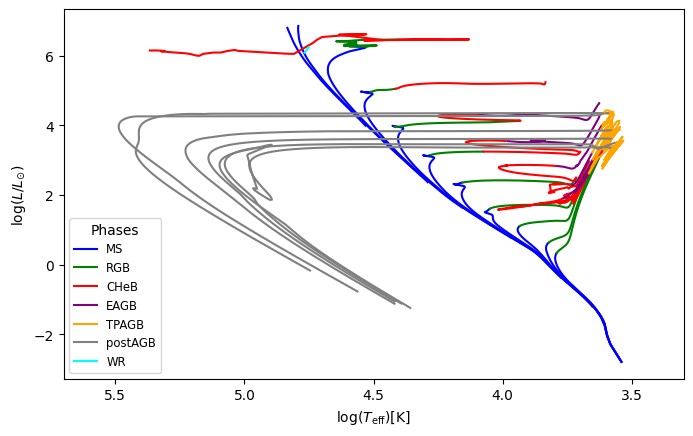

In [21]:
import physics.read_mist_models as read_mist_models
import matplotlib.lines as mlines

iso = read_mist_models.ISO('../../data/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.0_basic.iso')

ages = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.3]
colors = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55]
# utiliser ça (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range) pour normaliser si besoin

c_dict = {0 : "blue", 2 : "green", 3 : "red", 4 : "purple", 5 : "orange", 6 : "grey", 9 : "cyan"}
phase_dict = {-1 : "PMS", 0 : "MS", 2 : "RGB", 3 : "CHeB", 4 : "EAGB", 5 : "TPAGB", 6 : "postAGB", 9 : "WR"}

for i, age in enumerate(ages):
    age_ind = iso.age_index(age)
    logTeff = iso.isos[age_ind]['log_Teff']
    
    logL = iso.isos[age_ind]['log_L']

    phase_list = iso.isos[age_ind]['phase']
    for phase in c_dict.keys():
        if phase in phase_list:
            plt.plot(logTeff[phase_list == phase], logL[phase_list == phase], c=c_dict[phase])

plt.xlim(5.7, 3.3)
plt.xlabel(xlabel_HR_Kiel)
plt.ylabel(ylabel_HR)
plt.legend(title=legend_title_phase, fontsize="small", 
           handles = [mlines.Line2D([], [], color=c_dict[key], label=f"{phase_dict[key]}") for key in c_dict.keys()])
# plt.title("HR diagram for isochrones with differing ages and highlighted star phases")
# plt.savefig("C:/Users/antoi/Code/unif/MA2/Thèse/img/mes_images/HR_used_phases.pdf", format="pdf")

plt.show()